### Imports:

In [4]:
#For Warnings- 

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Installing Mediapipe-

pip install mediapipe


  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/e9/7b/cd671c5067a56e1b4a9b70d0e42ac8cdb9f63acdc186589827cf213802a5/mediapipe-0.10.9-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.1 kB ? eta -:--:--
     -------------------------- ----------- 112.6/162.1 kB 

In [7]:
#Imports-

import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

## Image Input:

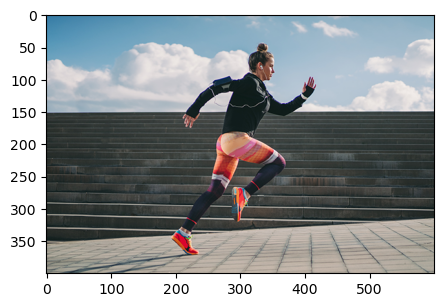

In [8]:
img = cv2.imread('C:/Users/DELL/Desktop/pose-running-600-stairs.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[5, 5])
plt.imshow(img)

## Understanding Pose:

In [9]:
#Pose Case-

mp_pose = mp.solutions.pose

In [10]:
#Calling Pose Function-

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

In [11]:
#Analysis the result-

results = pose.process(img)
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
#Normalizing Coordinates-

if results.pose_landmarks:
        for i in range(11, 15):
            print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

LEFT_SHOULDER:
x: 0.5554006
y: 0.2964196
z: 0.20330712
visibility: 0.9999999

RIGHT_SHOULDER:
x: 0.51649266
y: 0.26018906
z: -0.14979596
visibility: 0.9999999

LEFT_ELBOW:
x: 0.6165273
y: 0.36454782
z: 0.26285702
visibility: 0.99087286

RIGHT_ELBOW:
x: 0.4361252
y: 0.30039912
z: -0.2641018
visibility: 0.999047



In [13]:
#Feteching Landmark coordinates-

image_height, image_width, _ = img.shape

print(image_height)
print(image_width)

400
600


In [14]:
if results.pose_landmarks:
    for i in range(27, 32):
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

LEFT_ANKLE:
x: 214.60171937942505
y: 335.4595422744751
z: 51.979221403598785
visibility: 0.996212363243103

RIGHT_ANKLE:
x: 306.9135546684265
y: 276.6272306442261
z: -14.57689069211483
visibility: 0.9958244562149048

LEFT_HEEL:
x: 200.39629340171814
y: 341.5013790130615
z: 49.17646944522858
visibility: 0.9969436526298523

RIGHT_HEEL:
x: 295.61328291893005
y: 274.1943120956421
z: -6.06644544750452
visibility: 0.9849916100502014

LEFT_FOOT_INDEX:
x: 231.58952593803406
y: 366.16430282592773
z: 23.44394400715828
visibility: 0.9958996176719666



## Drawing the landmarks:

In [15]:
mp_drawing = mp.solutions.drawing_utils

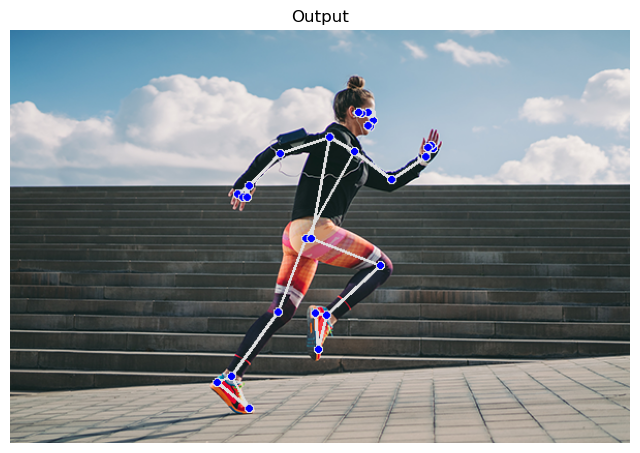

In [16]:
img_copy = img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [8, 8])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");
    plt.axis('off');
    plt.imshow(img_copy);
    plt.show();

## Understanding Landmark Distance:

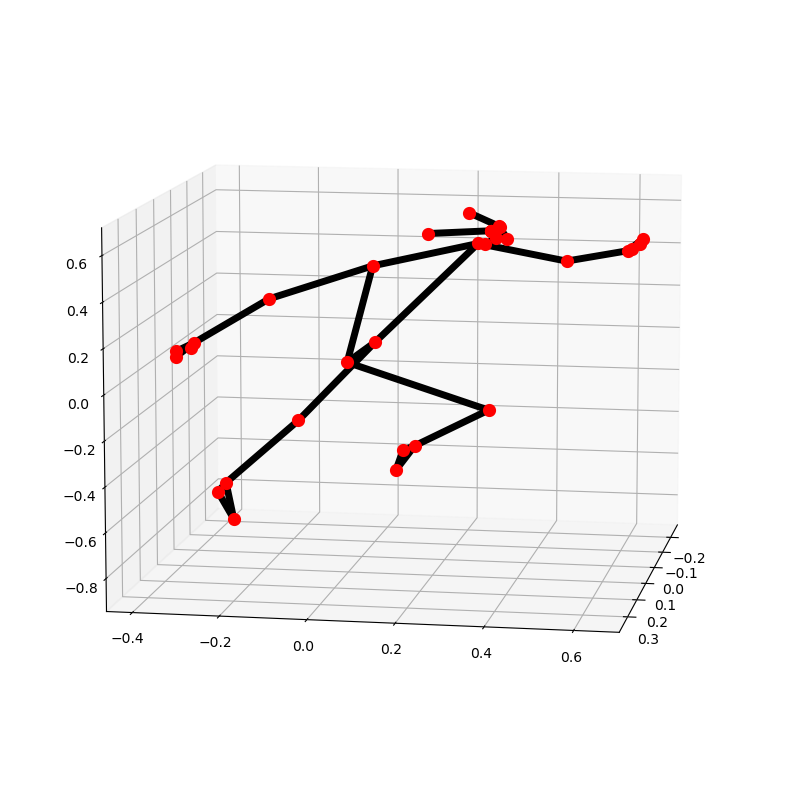

In [17]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

### With the 3D image we can clearly say that the right knee is clearly infront from other body parts